# Introduction
In this notebook, I'll  implement the [Word2Vec algorithm](https://en.wikipedia.org/wiki/Word2vec) using the skip-gram architecture as a starter step for sentiment analysis creating first the words embeddings then use these embeddings for sentiment analysis

In [5]:
# Define Constants and imports
import os
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
from string import punctuation
import src
from importlib import reload

reload(src)

raw_dataset_dir = "../dataset/raw"
prep_dataset_dir = "../dataset/preprocessed/skipgram"

In [2]:
import random

random.random()

0.04777781983362106

# Data Loading
- load and view the reviews dataset

In [3]:
os.listdir(raw_dataset_dir)

['labels.txt', 'reviews.txt', 'text8']

In [4]:
with open(os.path.join(raw_dataset_dir, "reviews.txt"), 'r') as reviews_file:
    raw_reviews_txt = reviews_file.read()

with open(os.path.join(raw_dataset_dir, "labels.txt"), 'r') as labels_file:
    raw_labels_txt = labels_file.read()

In [ ]:
print(raw_reviews_txt[:1000])
print(raw_labels_txt[:100])

- reviews are line separated and the reviews also

In [ ]:
# Note here the last index will be empty line so iam taking from 0 to n-1
reviews_list = raw_reviews_txt.split('\n')[:-1]
labels_list = raw_labels_txt.split('\n')[:-1]

In [ ]:
print(f"No Reviews:{len(reviews_list)}")
print(f"No Labels:{len(labels_list)}")

In [ ]:
words_counter = Counter(raw_reviews_txt.split())


In [9]:
words_df = pd.DataFrame(words_counter.items(), columns=['word', 'count'])
words_df.sort_values(by=['count'], ascending=False, inplace=True)
print(f"no of unique words={len(words_df)}\nno of words ={words_df['count'].sum()}")

no of unique words=74073
no of words =6347388


In [10]:
words_df.head()

,word,count
10,the,336713
6,.,327192
60,and,164107
3,a,163009
52,of,145864


In [11]:
words_df.describe()

,count
count,74073.000000
mean,85.690981
std,2372.293271
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,336713.000000


- high standard deviation due the usage of words like 'the' and punctuations and spaces will be discarded in data preprocessing
- 75% of the words count smaller than 11
- about 25% words appear once , may be misspelled words

<AxesSubplot:>

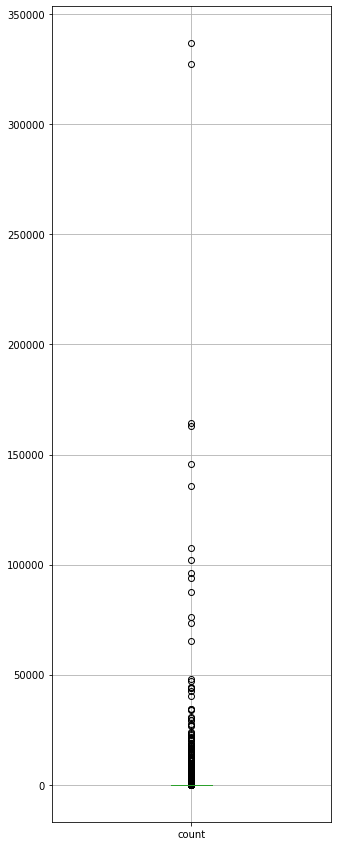

In [12]:
words_df.boxplot(figsize=(5, 15))

In [13]:
words_df.head(100)

,word,count
10,the,336713
6,.,327192
60,and,164107
3,a,163009
52,of,145864
...,...,...
770,way,8025
361,them,7970
499,could,7923
128,too,7833


# Data preprocessing
- remove punctuations
- remove noise words that appear once , that might be misspelling
- remove high frequent words that doesn't add thing to the neighboring word
- save the preprocessed data

In [2]:
prep_txt = src.remove_punctuations(raw_reviews_txt)


NameError: name 'raw_reviews_txt' is not defined

In [3]:
prep_txt, noise_words = src.remove_noise(raw_reviews_txt, filtering_ratio=1e3, prob_threshold=0.2, min_freq=2)

NameError: name 'raw_reviews_txt' is not defined

In [49]:
noise_words

['digusted',
 'ravetch',
 'mayday',
 'campsites',
 'happing',
 'heuristic',
 'trista',
 'citywide',
 'nausicca',
 'alberson',
 'scooping',
 'parliamentary',
 'feij',
 'purply',
 'kurta',
 'supposebly',
 'cripples',
 'hermamdad',
 'psychedelia',
 'hems',
 'lapyuta',
 'gapes',
 'bullard',
 'torino',
 'grower',
 'goldinger',
 'tels',
 'farenheit',
 'fukasaku',
 'ansonia',
 'pneumaticaly',
 'frisch',
 'calzone',
 'nowt',
 'jaongi',
 'actriss',
 'hairpin',
 'transunto',
 'intimacies',
 'sellon',
 'scarefests',
 'shiph',
 'constanly',
 'flavius',
 'subordination',
 'assi',
 'philharmoniker',
 'andunlike',
 'urichfamily',
 'damiana',
 'yuks',
 'spinsters',
 'mendocino',
 'whow',
 'woodmobile',
 'repose',
 'taximeter',
 'jezuz',
 'freddyshoop',
 'unhelpful',
 'talenamely',
 'northfork',
 'darthvader',
 'callousness',
 'mackichan',
 'epsilon',
 'frumpish',
 'mittel',
 'redstone',
 'secreteary',
 'enfantines',
 'kristoffersons',
 'cutdowns',
 'pancreatitis',
 'deployments',
 'wasson',
 'fashioni

In [50]:
len(noise_words)

27730

In [51]:
raw_reviews_txt[:250]

'bromwell high is a cartoon comedy . it ran at the same time as some other programs about school life  such as  teachers  . my   years in the teaching profession lead me to believe that bromwell high  s satire is much closer to reality than is  teache'

In [52]:
prep_txt[:250]

'bromwell high cartoon comedy ran same other programs school life such teachers years teaching profession lead believe bromwell high satire much closer reality teachers scramble survive financially insightful students right through pathetic teachers p'

In [53]:
with open(os.path.join(prep_dataset_dir, "reviews.txt"), 'w') as reviews_file:
    reviews_file.write(prep_txt)

In [54]:
prep_words_counter = Counter(prep_txt.split())
prep_words_df = pd.DataFrame(prep_words_counter.items(), columns=['word', 'count'])
print(f"no of unique words={len(prep_words_df)}\nno of words ={prep_words_df['count'].sum()}")
prep_words_df.sort_values(by=['count'], ascending=False, inplace=True)

no of unique words=46343
no of words =3063394


In [55]:
prep_words_df.head(100)

,word,count
18,much,9763
975,get,9309
433,bad,9308
122,been,9289
138,people,9285
...,...,...
133,going,4102
461,few,4076
5,same,4053
634,part,4040


- only `.` is removed with size `327192` , it was the second most frequent word , the std will decrease a little

In [56]:
prep_words_df.describe()

,count
count,46343.000000
mean,66.102626
std,368.406740
min,2.000000
25%,3.000000
50%,7.000000
75%,24.000000
max,9763.000000


<AxesSubplot:>

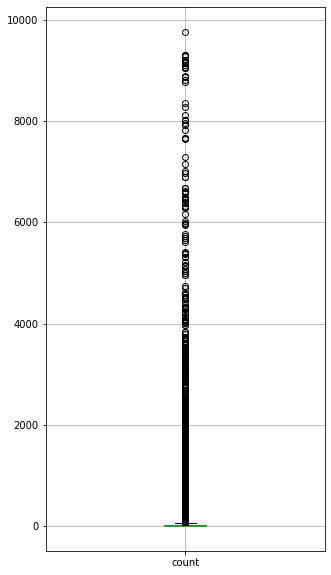

In [57]:
prep_words_df.boxplot(figsize=(5, 10))

In [58]:
prep_words_df.describe()

,count
count,46343.000000
mean,66.102626
std,368.406740
min,2.000000
25%,3.000000
50%,7.000000
75%,24.000000
max,9763.000000


In [59]:
prep_reviews_list = prep_txt.split('\n')
len(prep_reviews_list)

25000

# Skip-Gram Data loader
- Dataset Loader will load the txt data
- count the frequency for each word and total frequency which used in selecting the noise words which doesn't appear in the word context
- save a map for word to index and index to word , change txt to int
- iterate over the data , return each iteration the target which is the no of words around the given word with size `w` and the input will be the word repeated `w` times
    - ex if the txt is 'They celebrated his birthday with a big party.' and we are at the word 'birthday' and the window size = 4
        - input `[birthday,birthday,birthday,birthday]` target `[celebrated,his,with,a] `

In [6]:
with open(os.path.join(prep_dataset_dir, 'reviews.txt')) as prep_file:
    prep_txt = prep_file.read()

In [9]:
rev_skip_gram_data = src.Word2VecDataset(prep_txt, window_size=5, no_noise_outputs=5, batch_size=32)
rev_skip_gram_data.save_word2int('../dataset/preprocessed/sentiment_analysis')

In [7]:
itrr = iter(rev_skip_gram_data)
word, target, noise = next(itrr)

In [8]:
print(f"words_in shape {word.shape}")
print(f"target_words shape {target.shape}")
print(f"noise_words shape {noise.shape}")

words_in shape torch.Size([252])
target_words shape torch.Size([252])
noise_words shape torch.Size([252, 5])


In [9]:
import time
ts=time.time()
for i in range(10):
    word, target, noise = next(itrr)
print(time.time()-ts)

0.03839612007141113


In [10]:
print('word is-->', rev_skip_gram_data.int2word[word[0].item()])
print(rev_skip_gram_data.int2word[target[0].item()])


word is--> dhoom
wrote


In [11]:
import torch
from torch import optim
import numpy as np

In [12]:
word, target, noise = next(itrr)

# Training

In [18]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Get our noise distribution
# Using word frequencies calculated earlier in the notebook


# instantiating the model
embedding_dim = 32
model = src.SkipGram(rev_skip_gram_data.no_unique_words, embedding_dim).to(device)

# using the loss that we defined
criterion = src.NegativeSamplingLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

print_every = 5 #1500
steps = 0
epochs = 2

In [19]:
print_every = 1000 #1500
steps = 0
epochs = 2

In [20]:
from src.model_training import train
train_data_dir="../train_tracker"
weights_dir="../model_weights/skipgram"

In [21]:
train(model=model,epochs=epochs,skip_gram_data=rev_skip_gram_data,device=device,optimizer=optimizer,criterion=criterion,train_data_dir=train_data_dir,weights_dir=weights_dir)

 epoch 1[..........]time remaining (m) = 0.19 Avg Train_Loss=6.12810497Epoch: 1/2
Loss:  6.1217827796936035
such | pleasing, tricks, loved, postmodern, producing
while | ice, cp, delves, tashan, wrestler
plot | gross, phantom, stylized, prepared, indians
first | slit, bag, fair, books, heard
after | inadequacy, hid, intelligentsia, showed, cube
also | centre, missed, carlin, debt, overloaded
every | voice, poorly, river, northern, sweet
other | pig, planned, stricken, accomplice, bless
scott | ready, tile, spot, kept, unsympathetic
semi | wife, poor, shorts, lot, grandeur
ticket | floundering, agreements, lie, single, portraits
spite | enjoyably, coupled, edge, cryptic, preview
equally | ambitious, hoodlum, tea, king, come
entire | ruins, generally, cartoons, troubling, animated
twenty | myself, able, beyond, estranged, alone
holes | sitcom, excited, hazardous, climatic, flawless
...

 epoch 1[=.........]time remaining (m) = 0.14 Avg Train_Loss=6.09250561Epoch: 1/2
Loss:  5.85861301422